In [136]:
import pandas as pd
import seaborn as sns

df  = pd.read_csv("dds_ch2_nyt/nyt8.csv")
df

,Age,Gender,Impressions,Clicks,Signed_In
0,52,0,4,0,1
1,43,1,6,0,1
2,36,0,2,0,1
3,0,0,6,0,0
4,24,0,4,0,1
...,...,...,...,...,...
463191,46,1,3,0,1
463192,60,1,5,0,1
463193,26,1,6,0,1
463194,0,0,6,0,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463196 entries, 0 to 463195
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          463196 non-null  int64
 1   Gender       463196 non-null  int64
 2   Impressions  463196 non-null  int64
 3   Clicks       463196 non-null  int64
 4   Signed_In    463196 non-null  int64
dtypes: int64(5)
memory usage: 17.7 MB


In [138]:
def get_age_group(age):
    if age < 18:
        return "0-18"
    if age < 25:
        return "18-24"
    if age < 35:
        return "25-34"
    if age < 45:
        return "35-44"
    if age < 55:
        return "45-54"
    if age < 65:
        return "55-64"
    return "65+"

def get_gender(gender):
    if gender == 0:
        return "Female"
    if gender == 1:
        return "Male"
    
def get_signed_in(signed_in):
    if signed_in == 0:
        return "Not Sign In"
    if signed_in == 1:
        return "Sign In"

df['age_group'] = df.Age.apply(lambda age: get_age_group(age))
df['Localize_Gender'] = df.Gender.apply(lambda gender: get_gender(gender))
df['Localize_Signed_In'] = df.Signed_In.apply(lambda signed_in: get_signed_in(signed_in))

df = df.sort_values(by="age_group")
df

,Age,Gender,Impressions,Clicks,Signed_In,age_group,Localize_Gender,Localize_Signed_In
170533,0,0,9,0,0,0-18,Female,Not Sign In
154270,16,1,6,0,1,0-18,Male,Sign In
154271,0,0,8,0,0,0-18,Female,Not Sign In
154272,0,0,3,0,0,0-18,Female,Not Sign In
299145,0,0,7,0,0,0-18,Female,Not Sign In
...,...,...,...,...,...,...,...,...
121298,82,0,7,0,1,65+,Female,Sign In
370265,76,1,3,0,1,65+,Male,Sign In
121297,72,0,2,0,1,65+,Female,Sign In
259717,68,0,8,0,1,65+,Female,Sign In


In [139]:
cleared_df = df[(df.Age > 0) & (df.Age < 100)]
cleared_df

,Age,Gender,Impressions,Clicks,Signed_In,age_group,Localize_Gender,Localize_Signed_In
154270,16,1,6,0,1,0-18,Male,Sign In
154262,15,0,5,1,1,0-18,Female,Sign In
154240,17,1,6,1,1,0-18,Male,Sign In
154368,16,1,3,0,1,0-18,Male,Sign In
154380,16,0,8,1,1,0-18,Female,Sign In
...,...,...,...,...,...,...,...,...
121298,82,0,7,0,1,65+,Female,Sign In
370265,76,1,3,0,1,65+,Male,Sign In
121297,72,0,2,0,1,65+,Female,Sign In
259717,68,0,8,0,1,65+,Female,Sign In


<AxesSubplot:xlabel='age_group', ylabel='Clicks'>

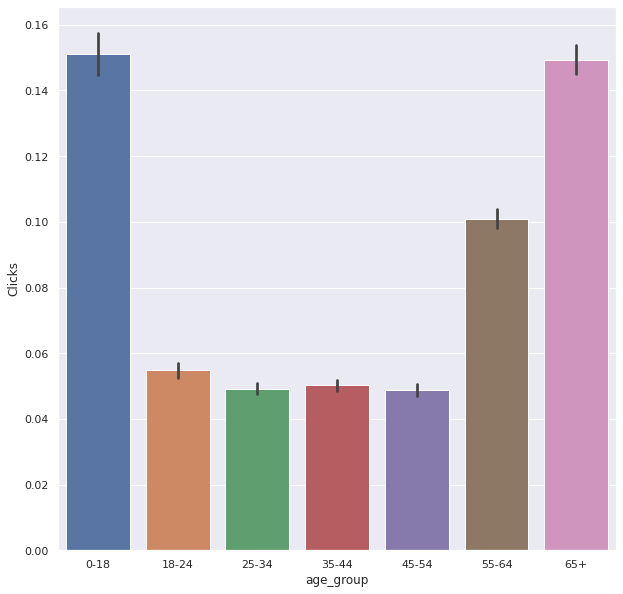

In [140]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.barplot(data=df, x=cleared_df['age_group'], y=cleared_df.Clicks)

<AxesSubplot:xlabel='age_group', ylabel='Clicks'>

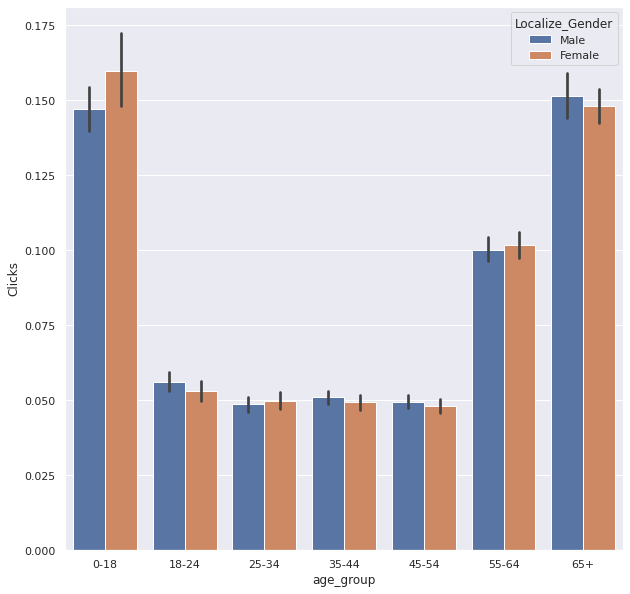

In [141]:
sns.barplot(
    data=cleared_df,
    x=cleared_df.age_group,
    y=cleared_df.Clicks,
    hue=cleared_df.Localize_Gender
)


In [142]:
grouped_by_age = cleared_df.groupby('age_group').sum().reset_index()
grouped_by_age['CTR'] = grouped_by_age.Clicks / grouped_by_age.Impressions

grouped_by_age

,age_group,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,0-18,214128,9712,69911,2122,14041,0.030353
1,18-24,853011,21840,204176,2240,40915,0.010971
2,25-34,1714756,31166,291321,2860,58146,0.009817
3,35-44,2816632,38146,356379,3582,71291,0.010051
4,45-54,3224814,34870,325276,3179,65139,0.009773
5,55-64,2687258,24159,226395,4561,45170,0.020146
6,65+,2112300,10645,144924,4324,28973,0.029836


<AxesSubplot:xlabel='age_group', ylabel='CTR'>

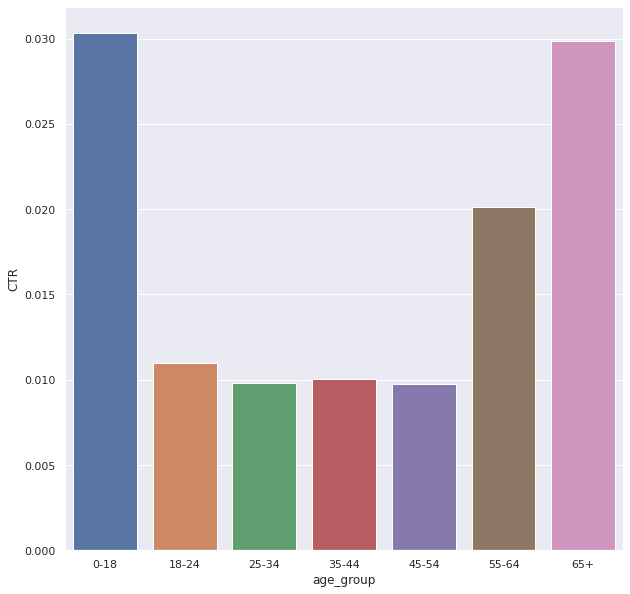

In [143]:
sns.barplot(data=grouped_by_age, x=grouped_by_age['age_group'], y=grouped_by_age.CTR)

<AxesSubplot:xlabel='age_group', ylabel='Signed_In'>

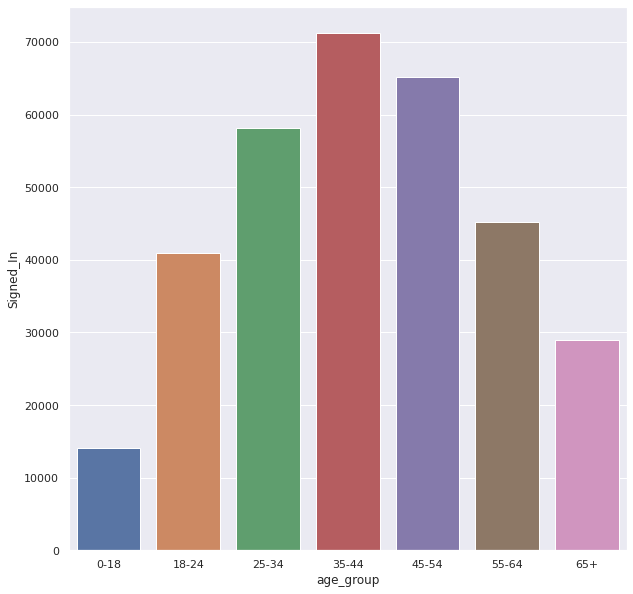

In [144]:
sns.barplot(data=grouped_by_age, x=grouped_by_age['age_group'], y=grouped_by_age.Signed_In)

In [145]:
grouped_by_age = cleared_df.groupby('age_group').median().reset_index()
grouped_by_age['CTR'] = grouped_by_age.Clicks / grouped_by_age.Impressions

grouped_by_age

,age_group,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,0-18,16,1,5,0,1,0.0
1,18-24,21,1,5,0,1,0.0
2,25-34,29,1,5,0,1,0.0
3,35-44,40,1,5,0,1,0.0
4,45-54,50,1,5,0,1,0.0
5,55-64,59,1,5,0,1,0.0
6,65+,72,0,5,0,1,0.0


0    16
1    21
2    29
3    40
4    50
5    59
6    72
Name: Age, dtype: int64

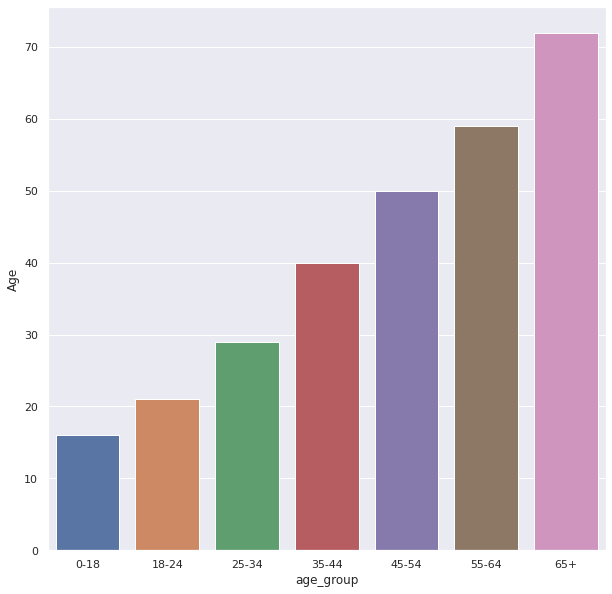

In [146]:
sns.barplot(data=grouped_by_age, x=grouped_by_age['age_group'], y=grouped_by_age.Age)
grouped_by_age.Age
# Median age in each group

In [147]:
grouped_by_age = cleared_df.groupby('age_group').max().reset_index()
grouped_by_age['CTR'] = grouped_by_age.Clicks / grouped_by_age.Impressions

grouped_by_age

,age_group,Age,Gender,Impressions,Clicks,Signed_In,Localize_Gender,Localize_Signed_In,CTR
0,0-18,17,1,15,3,1,Male,Sign In,0.200000
1,18-24,24,1,17,3,1,Male,Sign In,0.176471
2,25-34,34,1,16,3,1,Male,Sign In,0.187500
3,35-44,44,1,17,2,1,Male,Sign In,0.117647
4,45-54,54,1,17,3,1,Male,Sign In,0.176471
5,55-64,64,1,18,4,1,Male,Sign In,0.222222
6,65+,99,1,17,3,1,Male,Sign In,0.176471


<AxesSubplot:xlabel='age_group', ylabel='Impressions'>

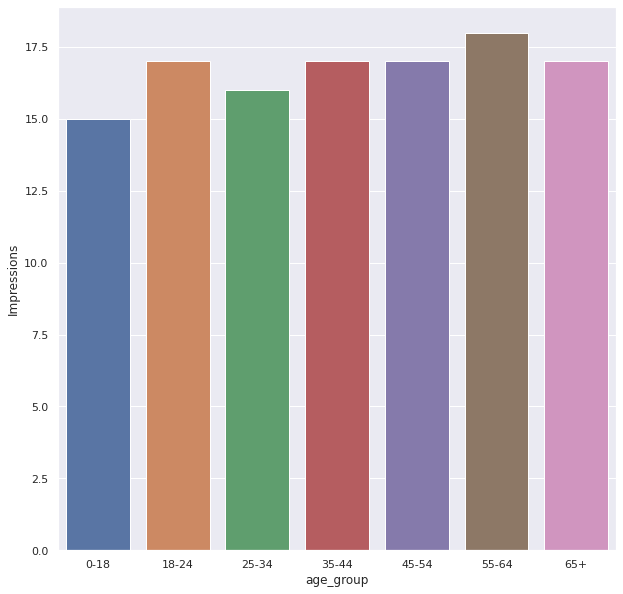

In [148]:
sns.barplot(data=grouped_by_age, x=grouped_by_age['age_group'], y=grouped_by_age.Impressions)

<AxesSubplot:xlabel='age_group', ylabel='Clicks'>

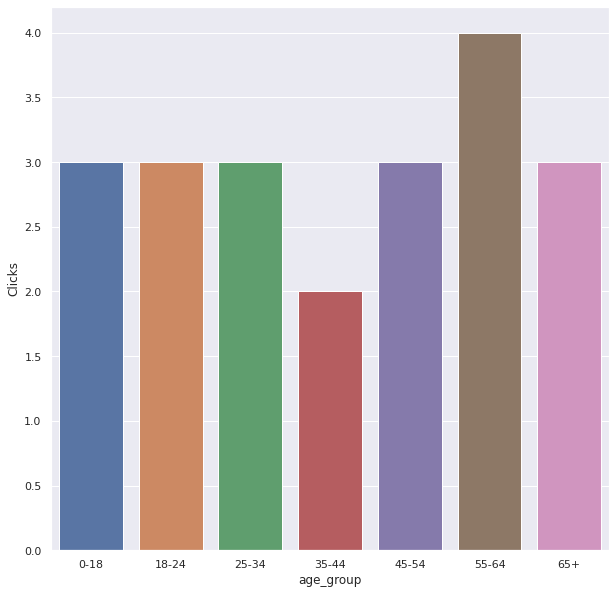

In [149]:
sns.barplot(data=grouped_by_age, x=grouped_by_age['age_group'], y=grouped_by_age.Clicks)

In [150]:
grouped_data = cleared_df.groupby(['age_group', 'Localize_Gender']).sum().reset_index()
grouped_data['CTR'] = grouped_data.Clicks / grouped_data.Impressions
grouped_data

,age_group,Localize_Gender,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,0-18,Female,65940,0,21791,692,4329,0.031756
1,0-18,Male,148188,9712,48120,1430,9712,0.029717
2,18-24,Female,397581,0,95625,1013,19075,0.010593
3,18-24,Male,455430,21840,108551,1227,21840,0.011303
4,25-34,Female,795332,0,134806,1345,26980,0.009977
5,25-34,Male,919424,31166,156515,1515,31166,0.009680
6,35-44,Female,1309761,0,166054,1634,33145,0.009840
7,35-44,Male,1506871,38146,190325,1948,38146,0.010235
8,45-54,Female,1498636,0,151059,1451,30269,0.009606
9,45-54,Male,1726178,34870,174217,1728,34870,0.009919


<AxesSubplot:xlabel='age_group', ylabel='CTR'>

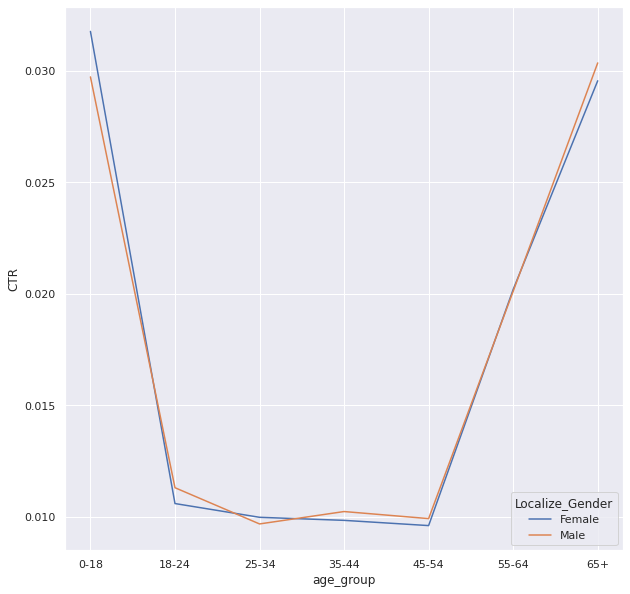

In [151]:
sns.lineplot(
    data=grouped_data,
    x="age_group",
    y='CTR',
    hue="Localize_Gender"
)

In [152]:
grouped_by_login = df.groupby('Localize_Signed_In').sum().reset_index()
grouped_by_login['CTR'] = grouped_by_login.Clicks / grouped_by_login.Impressions
grouped_by_login


,Localize_Signed_In,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,Not Sign In,0,0,697878,19593,0,0.028075
1,Sign In,13624421,170545,1618448,22872,323690,0.014132


<AxesSubplot:xlabel='Localize_Signed_In', ylabel='CTR'>

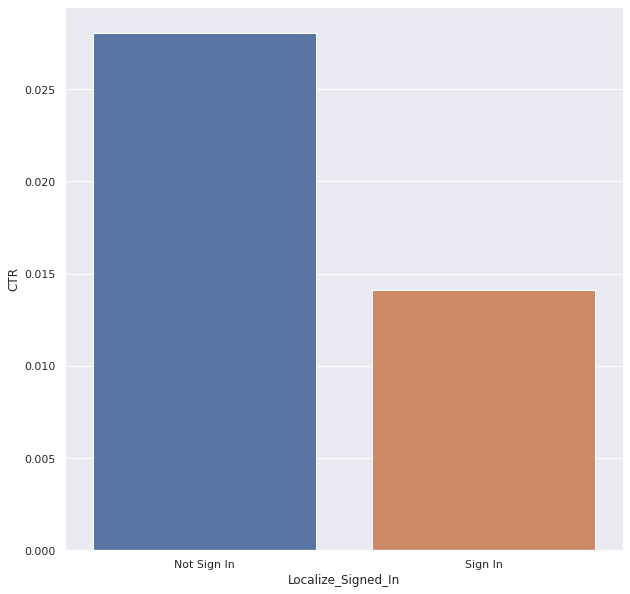

In [153]:
sns.barplot(data=grouped_by_login, x=grouped_by_login.Localize_Signed_In, y=grouped_by_login.CTR)

In [154]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,463196.000000,463196.000000,463196.000000,463196.000000,463196.000000
mean,29.413944,0.368192,5.000747,0.091678,0.698819
std,23.633323,0.482314,2.230163,0.308691,0.458772
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,105.000000,1.000000,18.000000,4.000000,1.000000
